<a href="https://colab.research.google.com/github/lf152152/Python/blob/master/01_artificial_intelligence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

# Artificial Intelligence in Finance

## Artificial Intelligence

Dr Yves J Hilpisch | The AI Machine

http://aimachine.io | http://twitter.com/dyjh

## Unsupervised Learning

In [2]:
import numpy as np
import pandas as pd
from pylab import plt, mpl
!pip install seaborn
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
np.set_printoptions(precision=4, suppress=True)

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

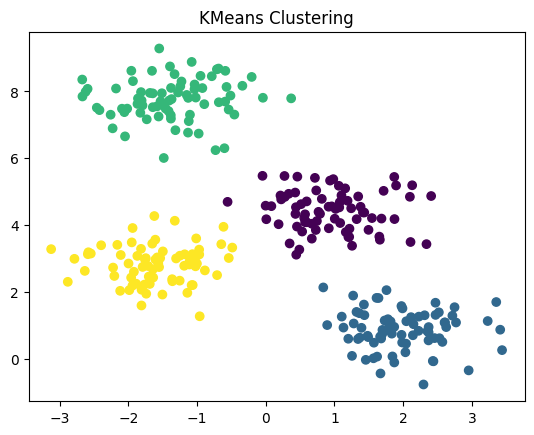

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# 使用make_blobs生成数据集
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# 使用KMeans进行聚类
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 可视化结果
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.title("KMeans Clustering")
plt.show()

In [ ]:
x, y = make_blobs(n_samples=100, centers=4,
                  random_state=500, cluster_std=1.25)

In [ ]:
model = KMeans(n_clusters=4, random_state=0)

In [ ]:
model.fit(x)

In [ ]:
y_ = model.predict(x)

In [ ]:
y_

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=y_,  cmap='coolwarm');

## Reinforcement Learning

In [ ]:
ssp = [1, 1, 1, 1, 0]

In [ ]:
asp = [1, 0]

In [ ]:
def epoch():
    tr = 0
    for _ in range(100):
        a = np.random.choice(asp)
        s = np.random.choice(ssp)
        if a == s:
            tr += 1
    return tr

In [ ]:
rl = np.array([epoch() for _ in range(15)])
rl

In [ ]:
rl.mean()

In [ ]:
ssp = [1, 1, 1, 1, 0]

In [ ]:
def epoch():
    tr = 0
    asp = [0, 1]
    for _ in range(100):
        a = np.random.choice(asp)
        s = np.random.choice(ssp)
        if a == s:
            tr += 1
        asp.append(s)
    return tr

In [ ]:
rl = np.array([epoch() for _ in range(15)])
rl

In [ ]:
rl.mean()

## Supervised Learning

### OLS Regression

In [ ]:
def f(x):
    return 2 * x ** 2 - x ** 3 / 3

In [ ]:
x = np.linspace(-2, 4, 25)
x

In [ ]:
y = f(x)
y

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro');

In [ ]:
beta = np.cov(x, y, ddof=0)[0, 1] / np.var(x)
beta

In [ ]:
alpha = y.mean() - beta * x.mean()
alpha

In [ ]:
y_ = alpha + beta * x

In [ ]:
MSE = ((y - y_) ** 2).mean()
MSE

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=3.0, label='linear regression')
plt.legend();

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for deg in [1, 2, 3]:
    reg = np.polyfit(x, y, deg=deg)
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg={deg} | MSE={MSE:.5f}')
    plt.plot(x, np.polyval(reg, x), label=f'deg={deg}')
plt.legend();

In [ ]:
reg

## Neural Network &mdash; `sklearn`

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
model = MLPRegressor(hidden_layer_sizes=3 * [256],
                     learning_rate_init=0.03,
                     max_iter=5000, random_state=1000)

In [ ]:
%time model.fit(x.reshape(-1, 1), y)

In [ ]:
y_ = model.predict(x.reshape(-1, 1))

In [ ]:
MSE = ((y - y_) ** 2).mean()
MSE

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=3.0, label='dnn estimation')
plt.legend();

### Neural Network &mdash; `Keras`

In [ ]:
import tensorflow as tf
tf.random.set_seed(100)

In [ ]:
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

In [ ]:
((y - y_) ** 2).mean()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for _ in range(1, 6):
    model.fit(x, y, epochs=100, verbose=False)
    y_ =  model.predict(x)
    MSE = ((y - y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x, y_, '--', label=f'round={_}')
plt.legend();

## Universal Approximation

In [ ]:
np.random.seed(0)
x = np.linspace(-1, 1)
y = np.random.random(len(x)) * 2 - 1

In [ ]:
len(x)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for deg in [1, 5, 9, 11, 13, 15]:
    reg = np.polyfit(x, y, deg=deg)
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg={deg:2d} | MSE={MSE:.5f}')
    plt.plot(x, np.polyval(reg, x), label=f'deg={deg}')
plt.legend();

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1))
for _ in range(3):
    model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

In [ ]:
model.summary()

In [ ]:
%%time
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for _ in range(1, 8):
    model.fit(x, y, epochs=500, verbose=False)
    y_ =  model.predict(x)
    MSE = ((y - y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x, y_, '--', label=f'round={_}')
plt.legend();

## Importance of Big Data

In [ ]:
f = 5
n = 10

In [ ]:
np.random.seed(100)

In [ ]:
x = np.random.randint(0, 2, (n, f))
x

In [ ]:
y = np.random.randint(0, 2, n)
y

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=f))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop',
             metrics=['acc'])

In [ ]:
h = model.fit(x, y, epochs=50, verbose=False)

In [ ]:
y_ = np.where(model.predict(x).flatten() > 0.5, 1, 0)
y_

In [ ]:
y == y_

In [ ]:
res = pd.DataFrame(h.history)

In [ ]:
res.plot(figsize=(10, 6));

In [ ]:
f = 10
n = 250

In [ ]:
np.random.seed(100)

In [ ]:
x = np.random.randint(0, 2, (n, f))
x[:4]

In [ ]:
y = np.random.randint(0, 2, n)
y[:4]

In [ ]:
2 ** f

In [ ]:
fcols = [f'f{_}' for _ in range(f)]
fcols

In [ ]:
data = pd.DataFrame(x, columns=fcols)
data['l'] = y

In [ ]:
data.info()

In [ ]:
grouped = data.groupby(list(data.columns))

In [ ]:
freq = grouped['l'].size().unstack(fill_value=0)

In [ ]:
freq['sum'] = freq[0] + freq[1]

In [ ]:
freq.head(10)

In [ ]:
freq['sum'].describe().astype(int)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
model = MLPClassifier(hidden_layer_sizes=[128, 128, 128],
                      max_iter=1000, random_state=100)

In [ ]:
model.fit(data[fcols], data['l'])

In [ ]:
accuracy_score(data['l'], model.predict(data[fcols]))

In [ ]:
split = int(len(data) * 0.7)

In [ ]:
train = data[:split]
test = data[split:]

In [ ]:
model.fit(train[fcols], train['l'])

In [ ]:
accuracy_score(train['l'], model.predict(train[fcols]))

In [ ]:
accuracy_score(test['l'], model.predict(test[fcols]))

In [ ]:
factor = 50

In [ ]:
big = pd.DataFrame(np.random.randint(0, 2, (factor * n, f)),
                   columns=fcols)

In [ ]:
big['l'] = np.random.randint(0, 2, factor * n)

In [ ]:
train = big[:split]
test = big[split:]

In [ ]:
model.fit(train[fcols], train['l'])

In [ ]:
accuracy_score(train['l'], model.predict(train[fcols]))

In [ ]:
accuracy_score(test['l'], model.predict(test[fcols]))

In [ ]:
grouped = big.groupby(list(data.columns))

In [ ]:
freq = grouped['l'].size().unstack(fill_value=0)

In [ ]:
freq['sum'] = freq[0] + freq[1]

In [ ]:
freq.head(6)

In [ ]:
freq['sum'].describe().astype(int)

In [ ]:
8 ** 25

<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

<br><br><br><a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:ai@tpq.io">ai@tpq.io</a>